# **Assignment 1: Dimond Price Prediction -Group 1**


## **Submitted by:**

---

> * Chirag Bansal (C0908045)

> * Sahibpreet Singh (C0928040)

> * Balpreet Singh (C0924974)

> * Suril Purohit (C0928435)

# Business Case Evaluation
## Business Case Evaluation for Diamond Price Prediction

**Business Case Creation**
* **Justification and Motivation**

    The main motivation which helps us to choose predicting dimond prices is that it helps the diamond marchants with all the insights to take decisions in a better way. It helps the dimond traders, retailes and even the investors to optimize the price strategies.

* **Goals of the Analysis**
    * Predict Pricing: Provide stakeholders with accurate predictions of diamond pricing, enhancing competitiveness in the market.

    * Risk Mitigation: Identify the potential risks which may fluctuations the price of diamond, allowing stakeholders to manage and mitigate there risks and minimize the loss.

# Data Identification for Diamond Price Prediction
## Using Largest Diamond Price Dataset from Kaggle
* For our analysis, we use the largest diamond price dataset which is available on Kaggle. This dataset contains a complete information about dimond like `size ` , `color`, `min_price` and other wide range of information related to diamond. Using this dataset allows us to conduct various experiments to get a information about the factors that affecting the diamond prices.

# Data Acquisition and Filtering

* We use a single dataset for this assignment which we get from kaggle which contains `26 columns` and `219703 rows`.

# Importing Libraries

In [1]:
# importing all the important libraries which are required for this assignment
import pandas as pd  # to play with dataframe
import numpy as np  # to do some mathematical tasks like geting all the numarical datatypes
import matplotlib.pyplot as plt  # to plot the graphs
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns  # to plot some more complex graphs like pairplot
from sklearn.model_selection import train_test_split #  importing trains test split which we use in splitting our data
from sklearn.metrics import mean_squared_error as MSE # to calculate the squared mean error
from sklearn.metrics import r2_score # to calculate r2 score

#  Importing different regression models to get the best accuracy
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import SGDRegressor, Lasso, Ridge
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,ElasticNet

# To ingnoring the warnings
import warnings
warnings.filterwarnings('ignore')


# Data Extraction

* Some of the data identified as input for the analysis may arrive in a format incompatible. Data Extraction lifecycle stage, is dedicated to extracting disparate data and transforming it into a format that the underlying Big Data solution.

***But in our case we are using a CSV file which doesn't have any compatibilty issue, so we doesn't required `data extraction` in this assignment.***

In [79]:
# Here we are using python's dataframe library Pandas to read the giver CSV file to perform oprations
# pd.read_csv function is used to read it where pd is pandas library and read_csv is function
df = pd.read_csv("/kaggle/input/the-largest-diamond-dataset-currely-on-kaggle/diamonds.csv")

In [80]:
# using .head() function to display the first 5 rows of the dataset on our dataframe variable 'df'
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [81]:
# Using .describe() method which is used to returns description of the data in the DataFrame
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [82]:
# Using .info method to prints the information or summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

In [83]:
#  It shows the shape of the dataset
df.shape

(219703, 26)

In [84]:
# Display all the columns of the dataset
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [85]:
# check null values in dataframe
df.isnull().values.any()

True

In [86]:
# It shows the sum of all null values in each column
df.isna().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

#### *as we see fluor_intensity has more that 60 percent of null values, so droping this column is a good practice*

In [87]:
#  Dropping the Unnamed and fluor_intensity column, unnamed because it is a serial number 
# so it doesn't provide any valuable information
df.drop(columns=['Unnamed: 0','fluor_intensity'],inplace=True)

In [88]:
#  Showing shape after droping the columns
df.shape

(219703, 25)

In [89]:
# Display's an int representing the number of elements in dataframe
df.size

5492575

In [90]:
# Here we are using the for loop to print the number of unique values of each column 
# using .unique() function
for col in df.columns:
    print(f'Column \033[1m{col}\033[0m has \033[1m{len(df[col].unique())}\033[0m values')

Column cut has 11 values
Column color has 11 values
Column clarity has 11 values
Column carat_weight has 878 values
Column cut_quality has 6 values
Column lab has 3 values
Column symmetry has 5 values
Column polish has 5 values
Column eye_clean has 5 values
Column culet_size has 9 values
Column culet_condition has 4 values
Column depth_percent has 534 values
Column table_percent has 235 values
Column meas_length has 1415 values
Column meas_width has 1155 values
Column meas_depth has 852 values
Column girdle_min has 10 values
Column girdle_max has 10 values
Column fluor_color has 6 values
Column fluor_intensity has 8 values
Column fancy_color_dominant_color has 13 values
Column fancy_color_secondary_color has 11 values
Column fancy_color_overtone has 9 values
Column fancy_color_intensity has 10 values
Column total_sales_price has 22202 values


# DATA AGGREGATION AND REPRESENTATION

* Data may be spread across multiple datasets, requiring that datasets be joined together via common fields. But in our case we don't need Data aggregation but we need to convert our categorical data into numarical data and will normalize our data in next steps i.e Data Analysis and Data Visulization

# DATA ANALYSIS and DATA VISUALIZATION

* Here we are combining Data analysis and visualization together, Firstly, these both are related to each other and secondly we are not able to analysis our data upto proper potential without doing Visualization along the side to analyzation.

## For Analysis purpose we are going to cover all point/steps given below:
* Target variable exploration
* Numerical variables exploration
* Finding the correlation between variables
* Normalizing values using standard scaling, label encoding, or one-hot encoding
* Splitting the data into test and train subsets
* Build a machine-learning model
* Perform a cross-validation technique

### For Visulization we are going to use different types for graph for which we are using diffrent libraries like
   * Matplotlib
   * Plotly
   * Seaborn

## Target variable exploration
***total_sales_price*** is the target column

In [91]:
#total_sales_price has 22k unique values
len(df['total_sales_price'].unique())

22202

In [92]:
#target variable
df_y = df['total_sales_price'] # Using df_y to seprating the target variable form the independent variables

In [93]:
# Sorting the total sales price according to the carat weight in decending order.
top_price_by_carat_weight=df[['carat_weight','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_carat_weight

,carat_weight,total_sales_price
219702,10.03,1449881
219701,0.90,1350000
219700,18.07,1315496
219699,5.17,1292500
219698,10.65,1210692
219697,10.04,1161102
219696,18.88,1132347
219695,10.00,1124122
219694,12.52,1121792
219693,12.52,1121792


In [94]:
# Sorting the total sales price according to the cut in decending order.
top_price_by_cut=df[['cut','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_cut

,cut,total_sales_price
219702,Pear,1449881
219701,Princess,1350000
219700,Round,1315496
219699,Radiant,1292500
219698,Round,1210692
219697,Oval,1161102
219696,Oval,1132347
219695,Cushion Modified,1124122
219694,Round,1121792
219693,Round,1121792


In [95]:
# Sorting the total sales price according to the meas length in decending order.
top_price_by_meas_length=df[['meas_length','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_meas_length

,meas_length,total_sales_price
219702,15.61,1449881
219701,5.22,1350000
219700,17.06,1315496
219699,11.55,1292500
219698,14.06,1210692
219697,14.13,1161102
219696,21.34,1132347
219695,11.78,1124122
219694,14.84,1121792
219693,14.84,1121792


In [96]:
# Sorting the total sales price according to the carat weight in decending order.
top_price_by_clarty=df[['clarity','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10]
top_price_by_clarty

,clarity,total_sales_price
219702,VVS2,1449881
219701,SI2,1350000
219700,VS1,1315496
219699,VS2,1292500
219698,VS1,1210692
219697,VS1,1161102
219696,VS2,1132347
219695,VVS1,1124122
219694,IF,1121792
219693,IF,1121792


<Axes: xlabel='total_sales_price'>

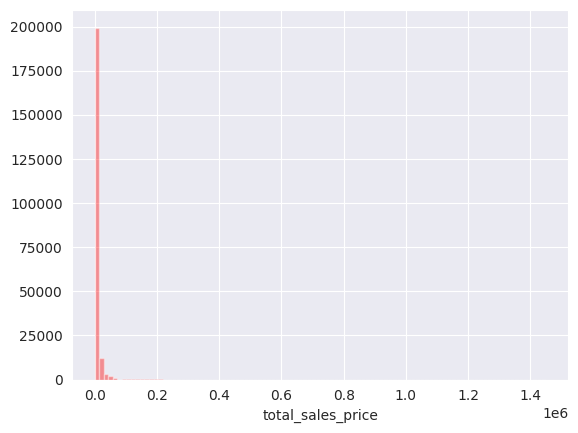

In [97]:
# set the background style of the plot
sns.set_style('darkgrid')

# Plotting Distribution plot for total_sales_price
sns.distplot(df['total_sales_price'], kde = False, color ='red', bins = 100)

In [98]:
# Display the Data type all the variables
df.dtypes

cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price                int64
dtype: object

In [ ]:
# Plotting Bar graphs for total_sales_price vs carat_weight and total_sales_price vs meas_length
plt.figure(figsize=(14, 15))
plt.subplot(2, 2, 1)
sns.barplot(top_price_by_carat_weight,x=df_y,y='carat_weight',color='teal',orient='h')
plt.title('top price by carat weight')
plt.subplot(2,2,2)
sns.barplot(top_price_by_meas_length,x=df_y,y='meas_length',color='cyan',orient='h')
plt.title('top price by meas length')
plt.show()

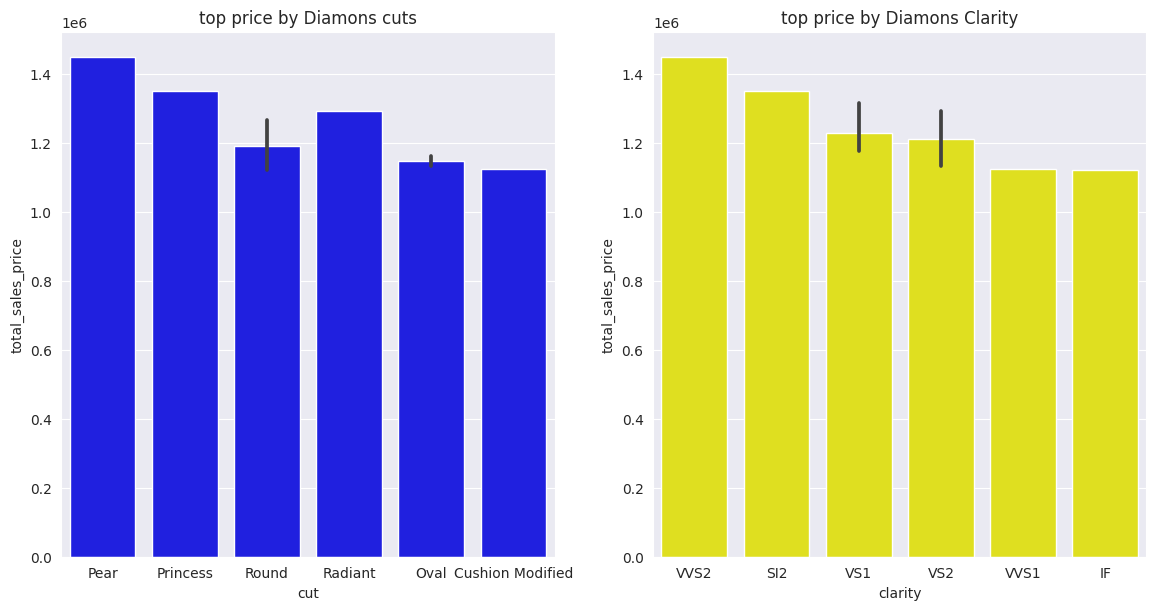

In [100]:
# Plotting Bar graphs for total_sales_price vs cut and total_sales_price vs clarity
plt.figure(figsize=(14, 15))
plt.subplot(2, 2, 1)
sns.barplot(top_price_by_cut,x='cut',y=df_y,color='blue',orient='v')
plt.title('top price by Diamons cuts')
plt.subplot(2,2,2)
sns.barplot(top_price_by_clarty,x='clarity',y=df_y,color='yellow',orient='v')
plt.title('top price by Diamons Clarity')
plt.show()

In [101]:
# droping our target variable from the main dataset
df.drop(columns=['total_sales_price'],inplace=True)

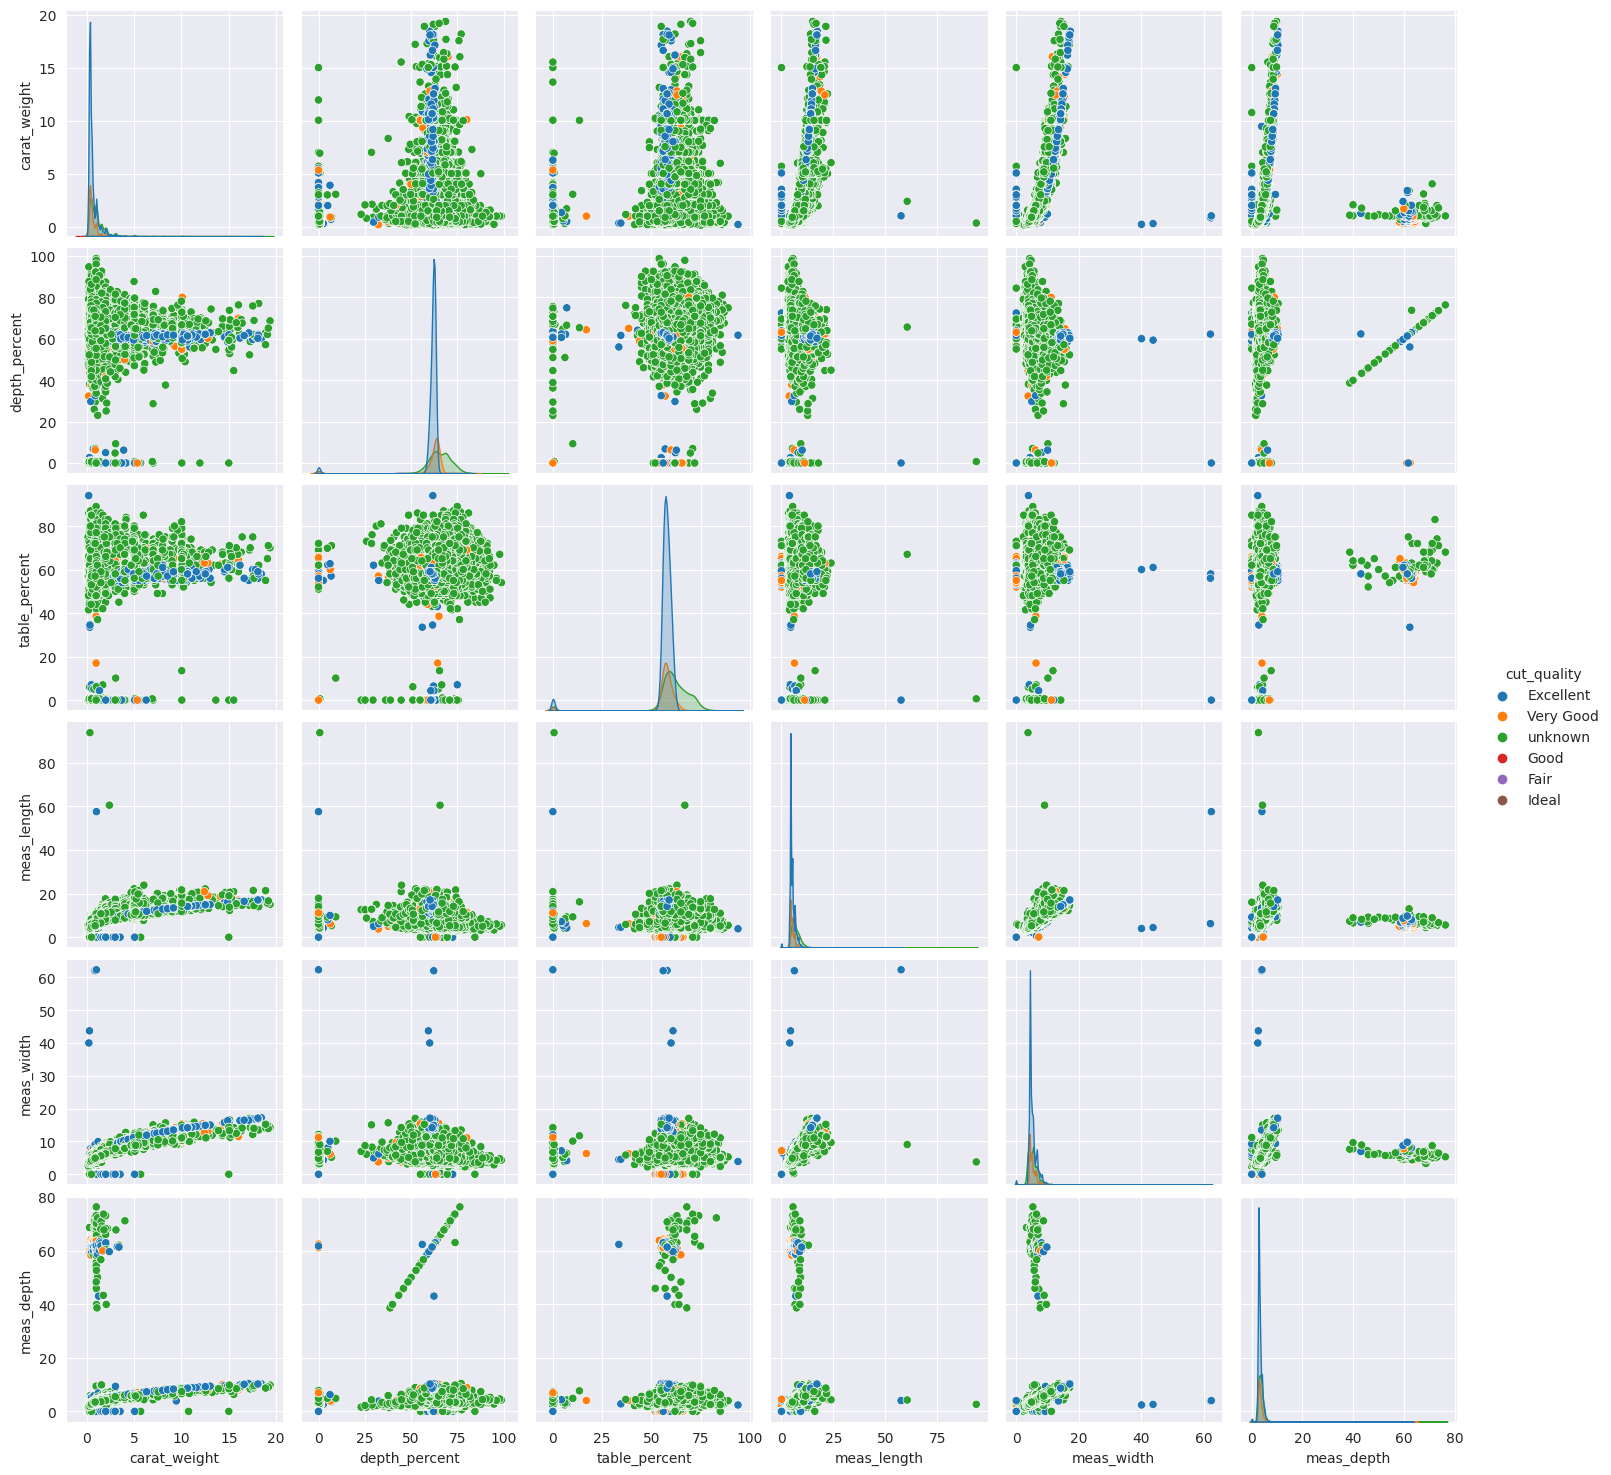

In [48]:
# To plot the pairwise plot of whole dataset
sns.pairplot(df, hue= "cut_quality" ) # using cut_quality as our hue to plot the graphs according to it

# Numarical variable exploration

In [102]:
#include all numerical cols
numarical_columns = df.select_dtypes(include=np.number).columns.tolist() # Selecting all the featues 
# having numarical data type and then use tolist to convert into an ordinery list
df_num = df[numarical_columns] # Converting them into a dataframe then
df_num.dtypes # printing the datatype of all the columns present in the df_num

carat_weight     float64
depth_percent    float64
table_percent    float64
meas_length      float64
meas_width       float64
meas_depth       float64
dtype: object

In [103]:
df_num.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.09,62.7,59.0,2.85,2.87,1.79
1,0.09,61.9,59.0,2.84,2.89,1.78
2,0.09,61.1,59.0,2.88,2.90,1.77
3,0.09,62.0,59.0,2.86,2.88,1.78
4,0.09,64.9,58.5,2.79,2.83,1.82


In [104]:
# number of unique values in each column
for col in df_num.columns: # Using for loop again to get column name one by one
    print(f'Numarical Column \033[1m{col}\033[0m has {len(df[col].unique())}') # Printing each numarical 
#   feature with its unique values

Numarical Column carat_weight has 878
Numarical Column depth_percent has 534
Numarical Column table_percent has 235
Numarical Column meas_length has 1415
Numarical Column meas_width has 1155
Numarical Column meas_depth has 852


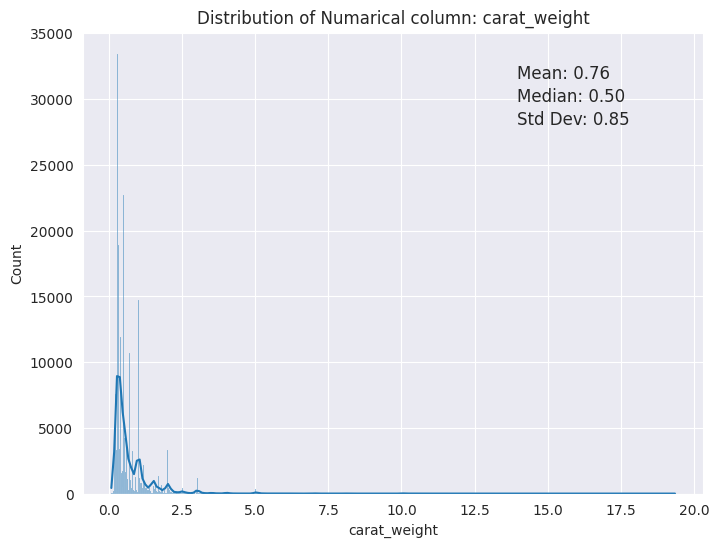

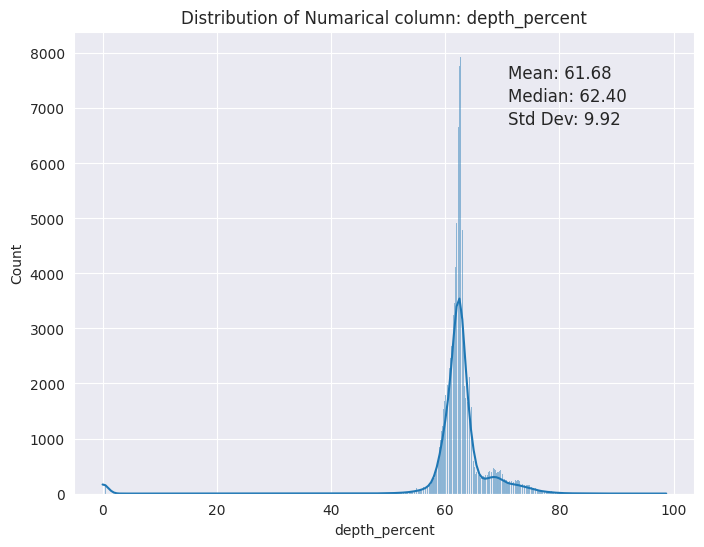

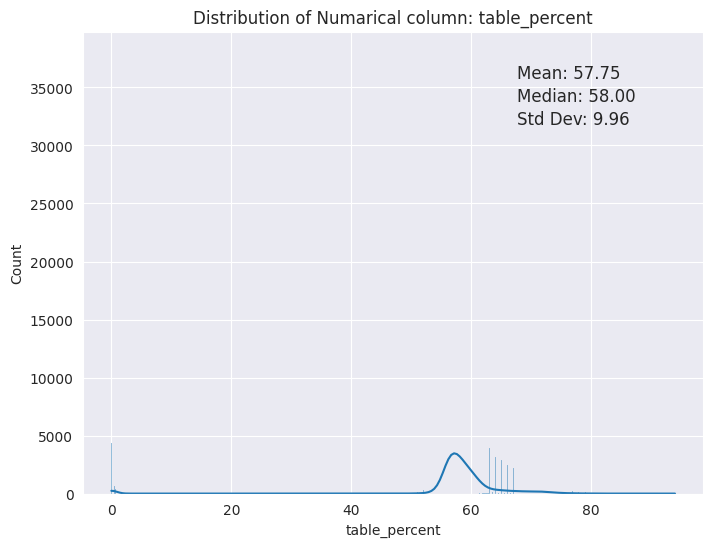

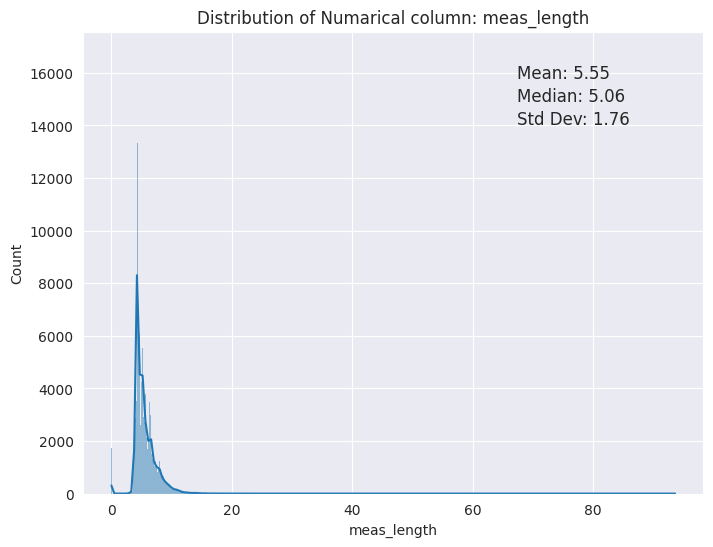

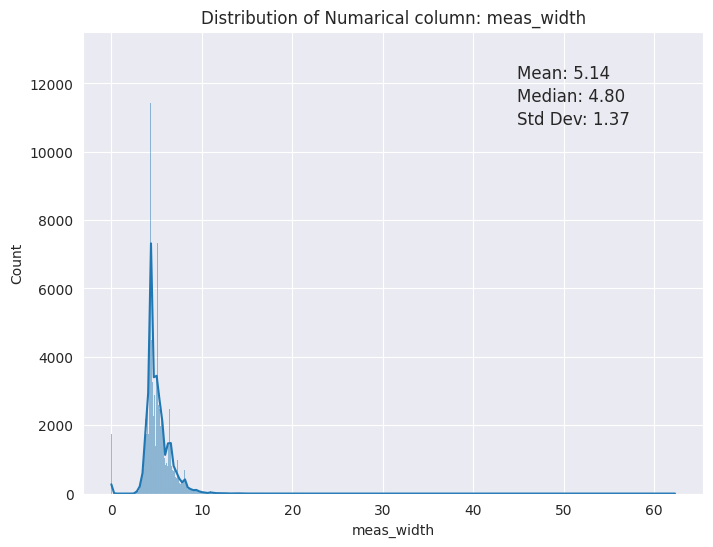

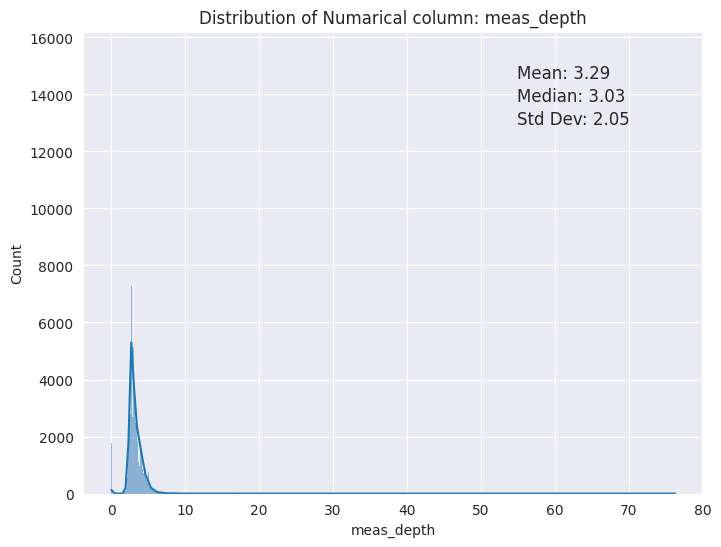

In [105]:
for col in df_num.columns:
    plt.figure(figsize=(8,6))
    
    sns.histplot(df[col],kde=True)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    sd_val = df[col].std()
    
    plt.text(0.7,0.9,f'Mean: {mean_val:.2f}',fontsize=12,fontfamily='cursive',transform=plt.gca().transAxes)
    plt.text(0.7,0.85,f'Median: {median_val:.2f}',fontsize=12,fontfamily='cursive',transform=plt.gca().transAxes)
    plt.text(0.7,0.8,f'Std Dev: {sd_val:.2f}',fontsize=12,fontfamily='cursive',transform=plt.gca().transAxes)
    
    plt.xlabel(col)
    plt.title(f'Distribution of Numarical column: {col}')
    plt.show()

# Finding the correlation between variables

In [106]:
#pearson correlation
df_num.corr() # Using .corr() function to find the pearson correlation of all the numarical variables

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth
carat_weight,1.000000,0.061724,0.090697,0.782683,0.788912,0.350719
depth_percent,0.061724,1.000000,0.673835,0.128791,0.119692,0.086477
table_percent,0.090697,0.673835,1.000000,0.165742,0.141250,0.082533
meas_length,0.782683,0.128791,0.165742,1.000000,0.788652,0.342209
meas_width,0.788912,0.119692,0.141250,0.788652,1.000000,0.412933
meas_depth,0.350719,0.086477,0.082533,0.342209,0.412933,1.000000


<Axes: >

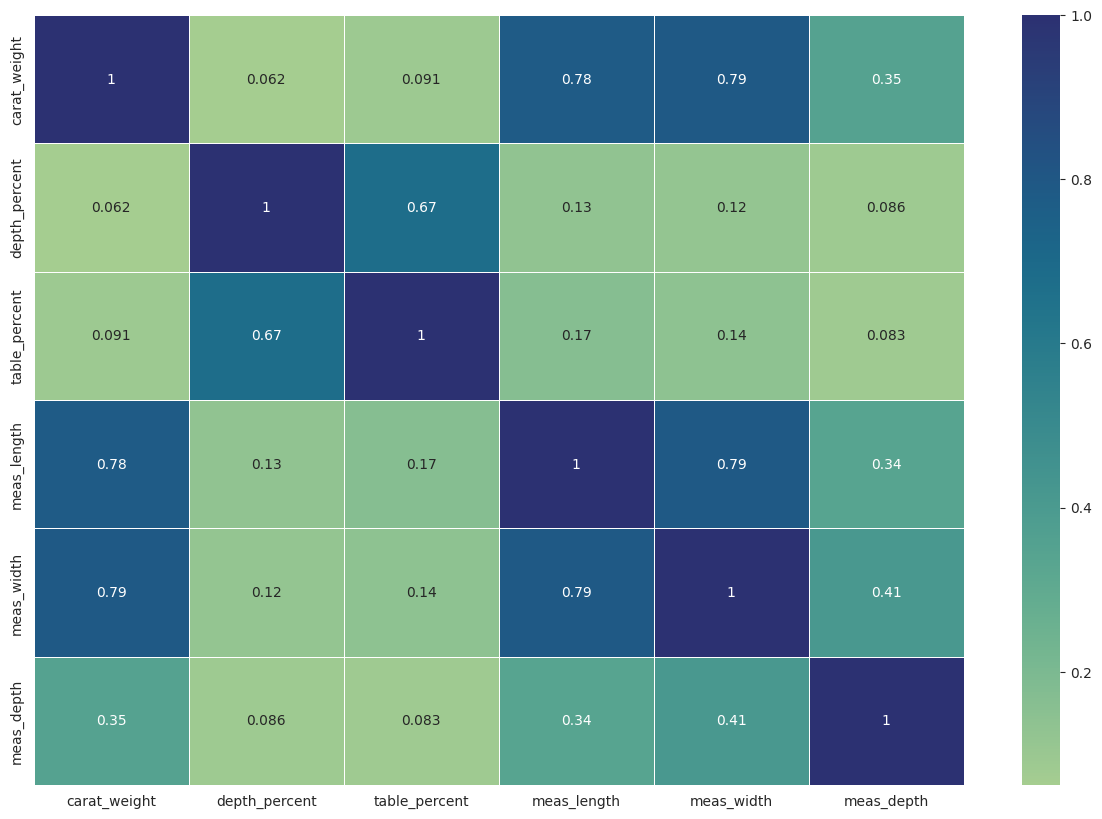

In [107]:
# heatmap
plt.figure(figsize=(15,10)) # Defining the graph size
sns.heatmap(df_num.corr(),annot=True,linewidth=.5,cmap='crest') # visulizing the above correlation 
# using heatmap using Seaborn library

# Categorical

In [108]:
categorical_columns = df.select_dtypes(include=['object']).columns

print('Categorical Columns are: ', end='')
for col in categorical_columns:
    print(col,end=', ')

Categorical Columns are: cut, color, clarity, cut_quality, lab, symmetry, polish, eye_clean, culet_size, culet_condition, girdle_min, girdle_max, fluor_color, fluor_intensity, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity, 

In [109]:
df_cat = df[categorical_columns]

In [110]:
for col in categorical_columns:
    print(f'Total Unique Values in \033[1m{col}\033[0m are \033[1m{len(df_cat[col].unique())}\033[0m')

Total Unique Values in cut are 11
Total Unique Values in color are 11
Total Unique Values in clarity are 11
Total Unique Values in cut_quality are 6
Total Unique Values in lab are 3
Total Unique Values in symmetry are 5
Total Unique Values in polish are 5
Total Unique Values in eye_clean are 5
Total Unique Values in culet_size are 9
Total Unique Values in culet_condition are 4
Total Unique Values in girdle_min are 10
Total Unique Values in girdle_max are 10
Total Unique Values in fluor_color are 6
Total Unique Values in fluor_intensity are 8
Total Unique Values in fancy_color_dominant_color are 13
Total Unique Values in fancy_color_secondary_color are 11
Total Unique Values in fancy_color_overtone are 9
Total Unique Values in fancy_color_intensity are 10


In [111]:
for col in categorical_columns:
    print(f'Unique Vales of Column {col} are: ')
    print(df_cat[col].unique(),'\n')

Unique Vales of Column cut are: 
['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher'] 

Unique Vales of Column color are: 
['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown'] 

Unique Vales of Column clarity are: 
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3'] 

Unique Vales of Column cut_quality are: 
['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal'] 

Unique Vales of Column lab are: 
['IGI' 'GIA' 'HRD'] 

Unique Vales of Column symmetry are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

Unique Vales of Column polish are: 
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

Unique Vales of Column eye_clean are: 
['unknown' 'Yes' 'E1' 'Borderline' 'No'] 

Unique Vales of Column culet_size are: 
['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL'] 

Unique Vales of Column culet_condition are: 
['unknown' 'Abraded' 'Chipped' 'Pointed'] 

Unique Vales of Column girdle_min are: 
['M' 'STK' 'TN' 'TK' 'unknow

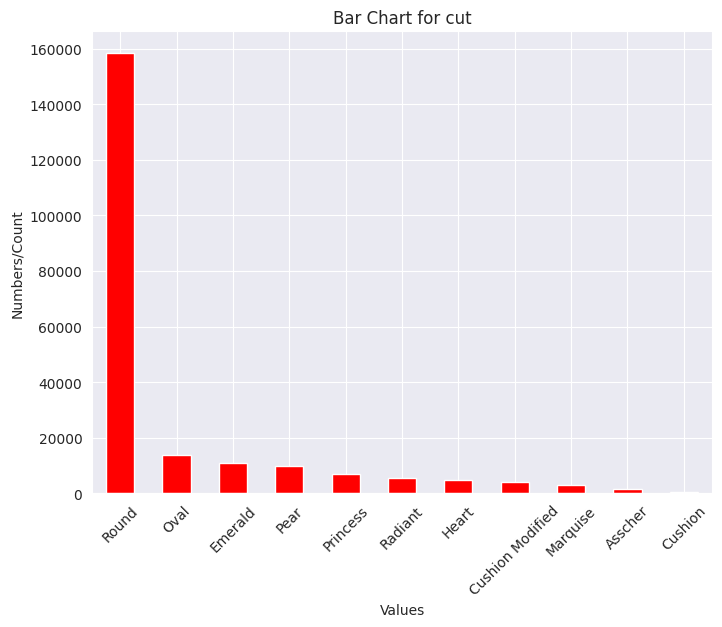

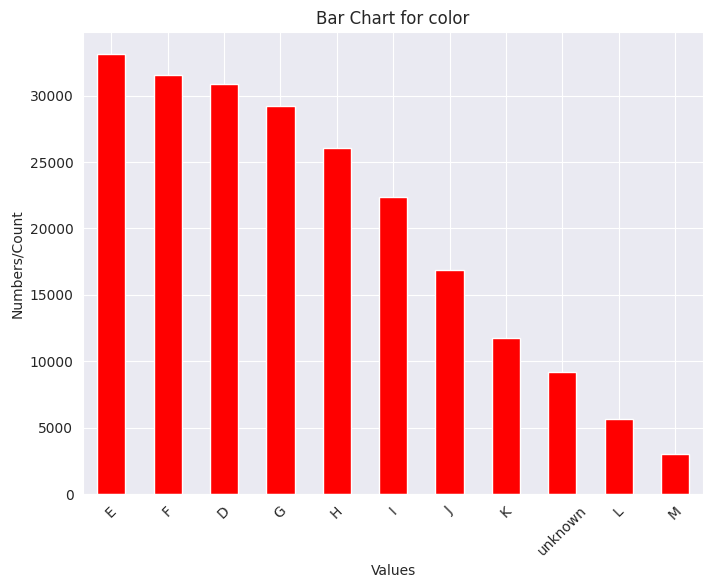

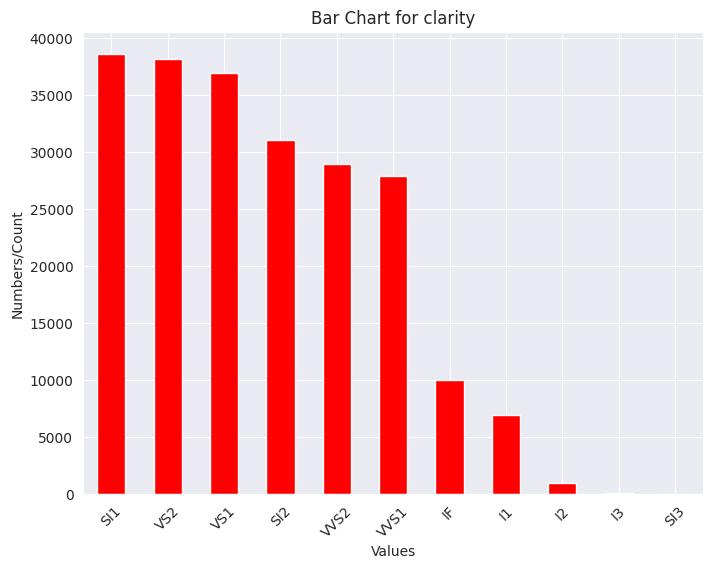

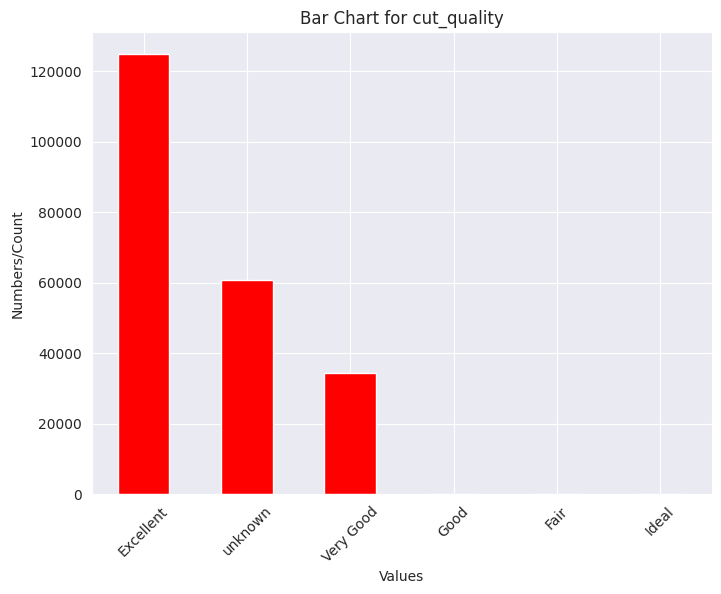

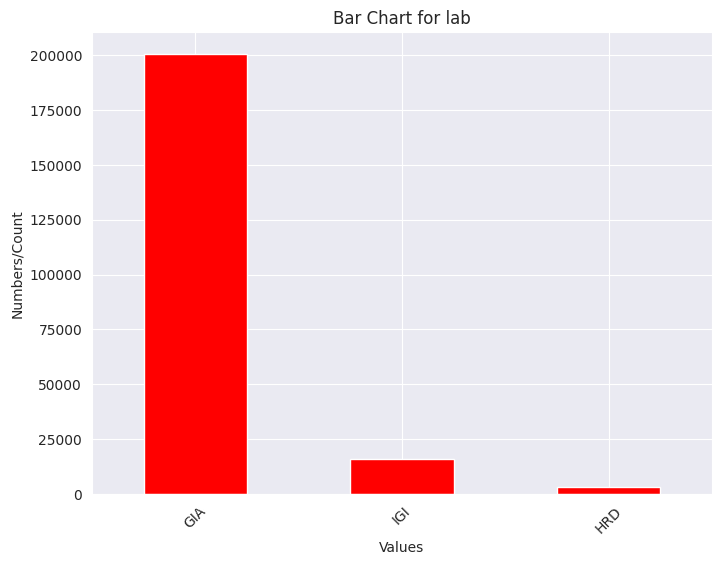

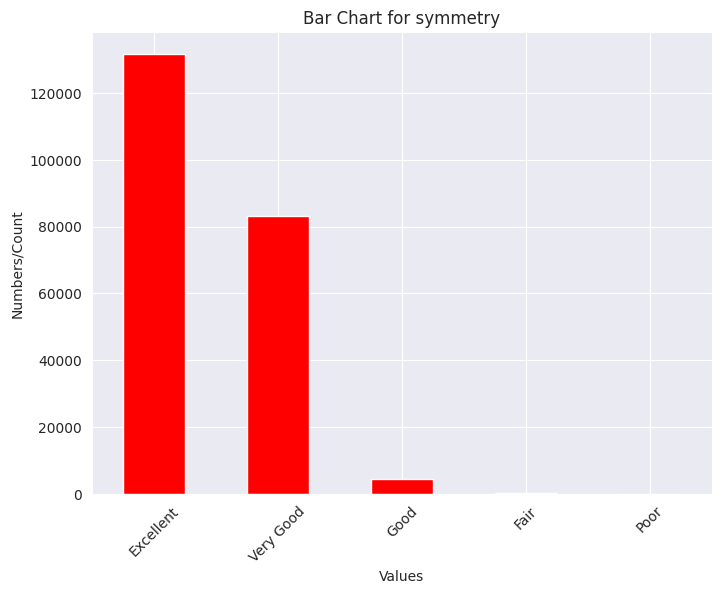

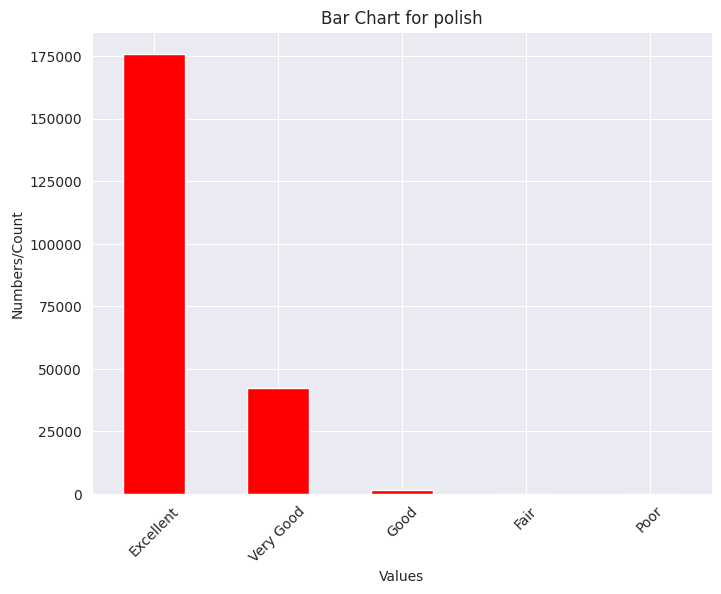

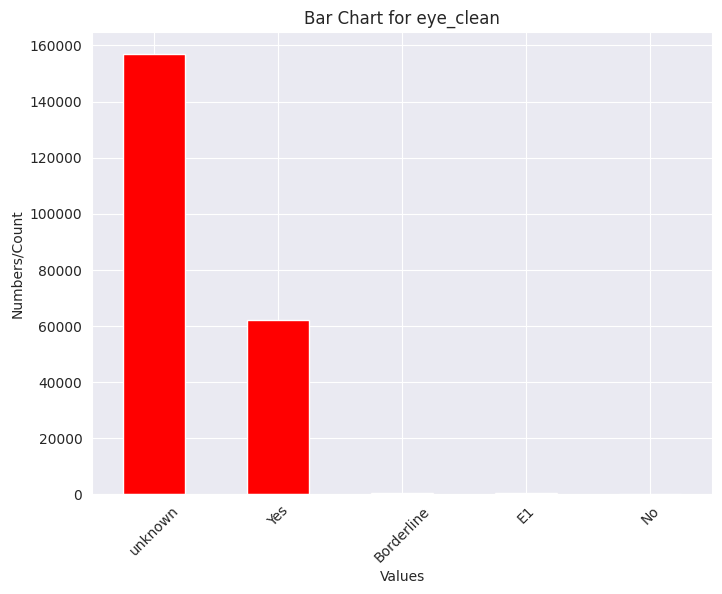

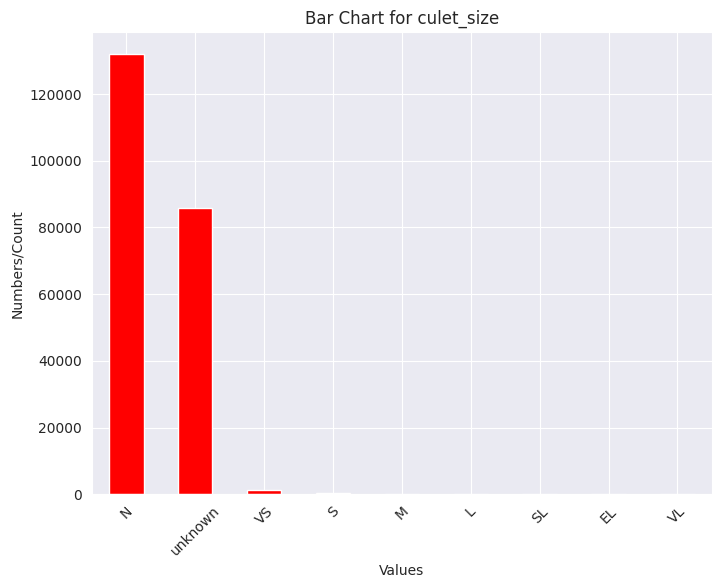

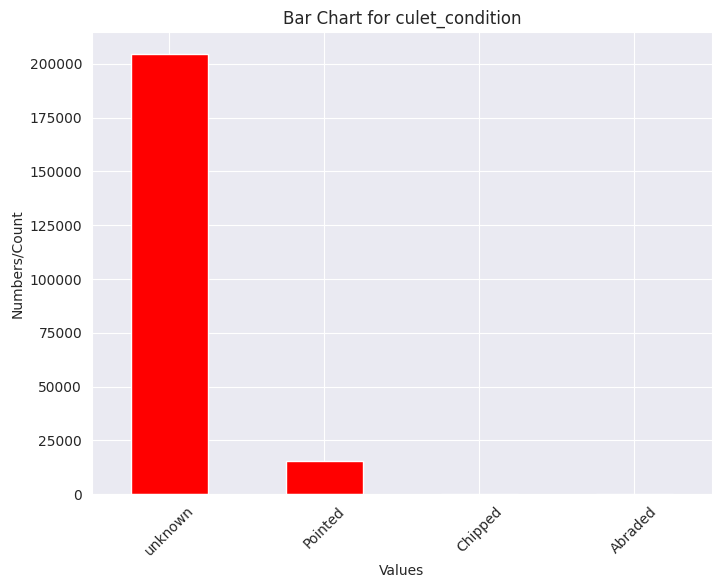

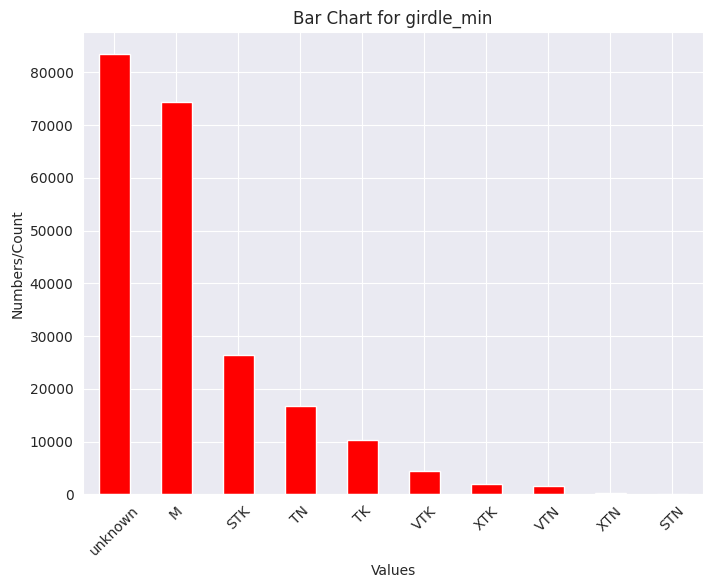

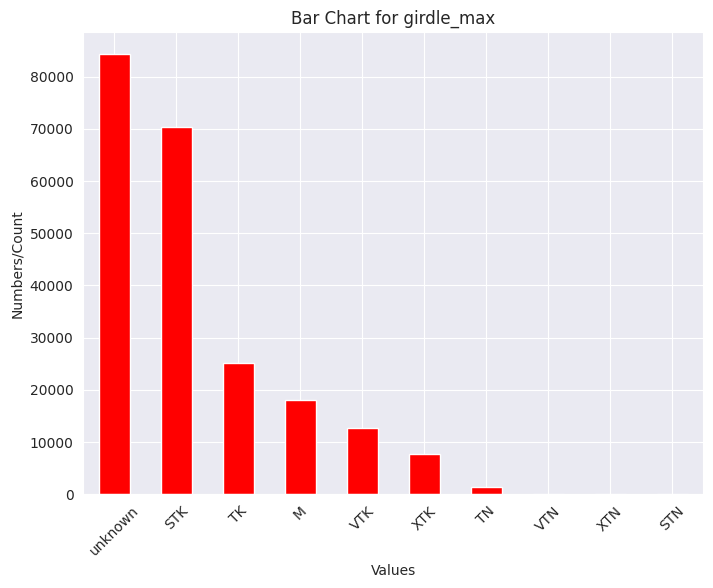

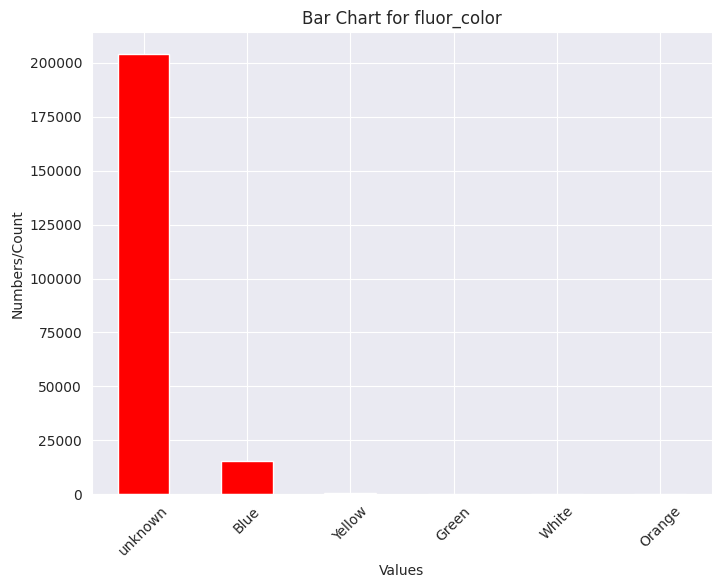

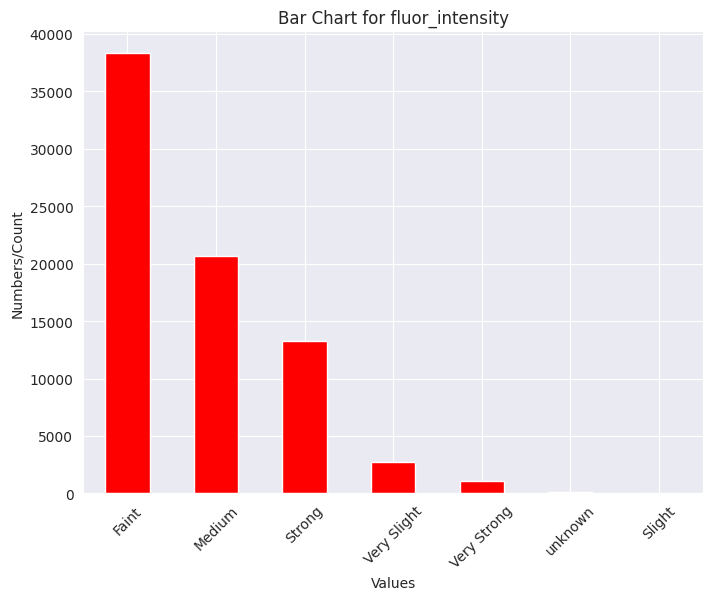

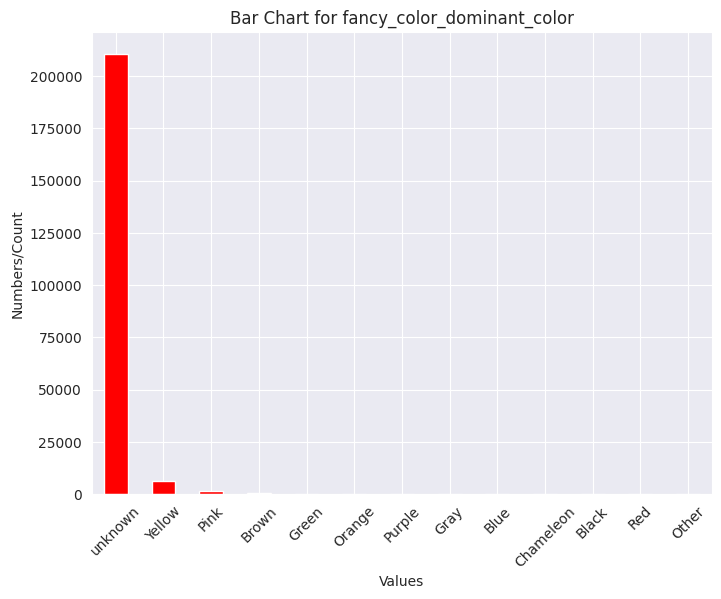

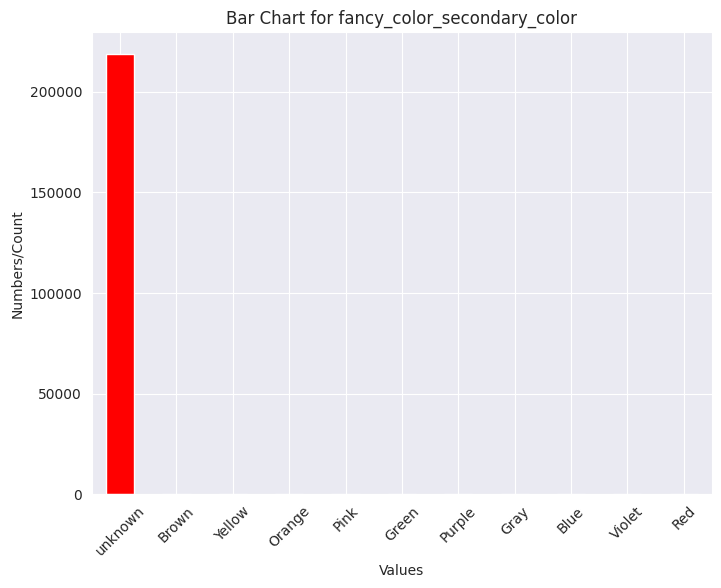

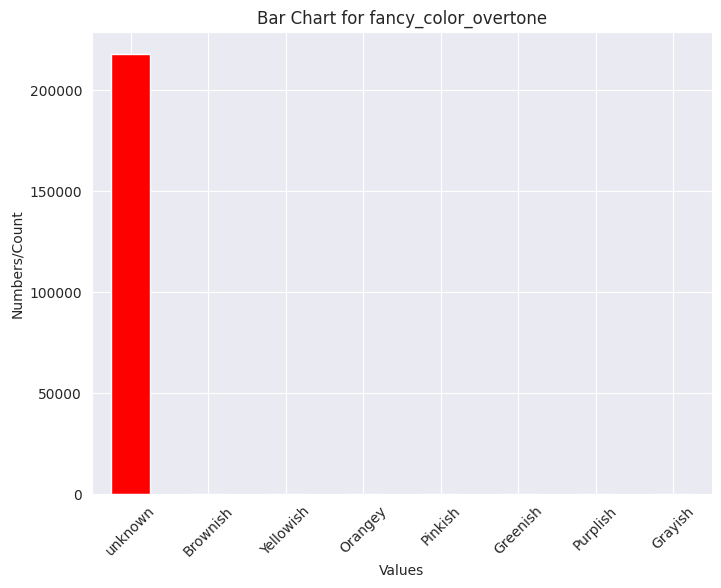

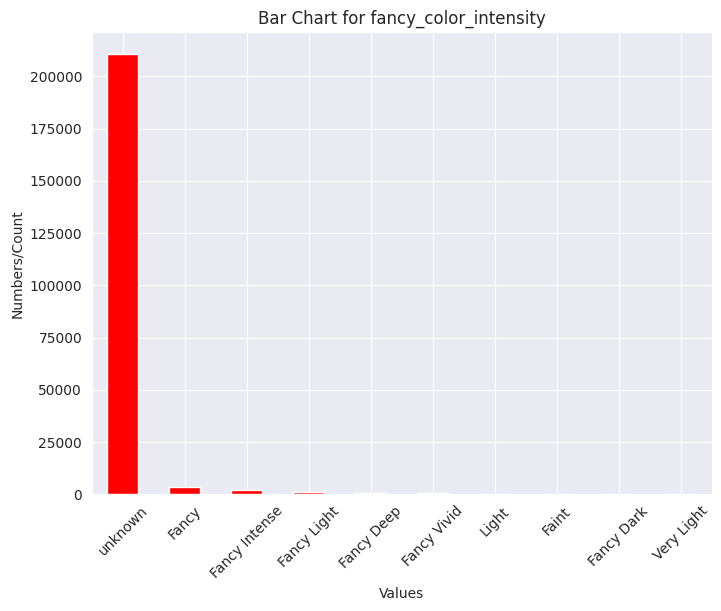

In [112]:
for col in categorical_columns:
    plt.figure(figsize=(8,6))
    df_cat[col].value_counts().plot(kind='bar',color = 'red')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel('Values')
    plt.ylabel('Numbers/Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()
#     plt.bar(df_cat[col])

In [113]:
df_cat.isnull().sum()

cut                                 0
color                               0
clarity                             0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
dtype: int64

In [114]:
df_cat['fancy_color_overtone'].fillna(df_cat['fancy_color_overtone'].mode()[0],inplace=True)

In [115]:
for col in categorical_columns:
    values = df_cat[col].value_counts()
    print(f'Value Counts for{col}')
    print(values)
    print()

Value Counts forcut
cut
Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: count, dtype: int64

Value Counts forcolor
color
E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: count, dtype: int64

Value Counts forclarity
clarity
SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: count, dtype: int64

Value Counts forcut_quality
cut_quality
Excellent    124861
unknown       60607
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: count, dtype: int64

Value Coun

In [116]:
categories = ['cut_quality','polish','culet_size','culet_condition','symmetry','fancy_color_intensity']

df_encoded = df[categories].copy()

# Create OrdinalEncoder instance
encoder = OrdinalEncoder()

# Fit and transform the data
df_encoded[categories] = encoder.fit_transform(df_cat[categories])

df_encoded = df_encoded.astype(int)

print(df_encoded)


        cut_quality  polish  culet_size  culet_condition  symmetry  \
0                 0       4           3                3         4   
1                 4       4           3                3         4   
2                 0       4           8                3         4   
3                 0       4           8                3         4   
4                 4       0           3                3         4   
...             ...     ...         ...              ...       ...   
219698            0       0           3                3         0   
219699            5       4           8                3         4   
219700            0       0           3                3         0   
219701            5       2           3                3         2   
219702            5       0           8                3         4   

        fancy_color_intensity  
0                           9  
1                           9  
2                           9  
3                           9  

In [120]:
for col in categories:
    categorical_columns.tolist().remove(col)
print(categorical_columns)

Index(['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish',
       'eye_clean', 'culet_size', 'culet_condition', 'girdle_min',
       'girdle_max', 'fluor_color', 'fluor_intensity',
       'fancy_color_dominant_color', 'fancy_color_secondary_color',
       'fancy_color_overtone', 'fancy_color_intensity'],
      dtype='object')


In [121]:
df_cat_dummy=pd.get_dummies(df[categorical_columns], prefix=categorical_columns)

In [122]:
complete_x_df=pd.concat([df_num,df_cat_dummy,df_encoded],axis=1)

In [123]:
complete_x_df.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,...,fancy_color_intensity_Fancy Vivid,fancy_color_intensity_Light,fancy_color_intensity_Very Light,fancy_color_intensity_unknown,cut_quality,polish,culet_size,culet_condition,symmetry,fancy_color_intensity
0,0.09,62.7,59.0,2.85,2.87,1.79,False,False,False,False,...,False,False,False,True,0,4,3,3,4,9
1,0.09,61.9,59.0,2.84,2.89,1.78,False,False,False,False,...,False,False,False,True,4,4,3,3,4,9
2,0.09,61.1,59.0,2.88,2.90,1.77,False,False,False,False,...,False,False,False,True,0,4,8,3,4,9
3,0.09,62.0,59.0,2.86,2.88,1.78,False,False,False,False,...,False,False,False,True,0,4,8,3,4,9
4,0.09,64.9,58.5,2.79,2.83,1.82,False,False,False,False,...,False,False,False,True,4,0,3,3,4,9


In [124]:
complete_x_df.shape

(219703, 157)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(complete_x_df, df_y, test_size=0.4, random_state=14)

In [126]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((131821, 157), (87882, 157), (131821,), (87882,))

In [127]:
X_train.head()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,...,fancy_color_intensity_Fancy Vivid,fancy_color_intensity_Light,fancy_color_intensity_Very Light,fancy_color_intensity_unknown,cut_quality,polish,culet_size,culet_condition,symmetry,fancy_color_intensity
56218,0.30,62.4,56.0,4.27,4.29,2.67,False,False,False,False,...,False,False,False,True,0,0,3,3,0,9
138944,0.70,68.7,68.0,5.62,4.29,2.95,False,False,False,True,...,False,False,False,True,5,0,3,3,4,9
173920,1.30,62.2,57.0,6.92,6.96,4.32,False,False,False,False,...,False,False,False,True,0,0,3,3,0,9
190683,1.71,62.3,56.0,7.57,7.62,4.75,False,False,False,False,...,False,False,False,True,0,0,8,3,0,9
170463,0.90,70.3,64.0,5.22,5.01,3.52,True,False,False,False,...,False,False,False,True,5,0,3,3,0,9


In [128]:
models = [KNeighborsRegressor(), SGDRegressor(), Lasso(), Ridge(),DecisionTreeRegressor(random_state=0),ElasticNet(random_state=0),LinearRegression(),CatBoostRegressor(), XGBRegressor()]
for model in models:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    score = r2_score(y_test, ypred)
    print("model: {}  score {}".format(model, score))

model: KNeighborsRegressor()  score 0.6614040611847032
model: SGDRegressor()  score -94634.26706740007
model: Lasso()  score 0.6403748648443428
model: Ridge()  score 0.6418682968942582
model: DecisionTreeRegressor(random_state=0)  score 0.780078056888124
model: ElasticNet(random_state=0)  score 0.45671381819594725
model: LinearRegression()  score 0.6500875662878266
Learning rate set to 0.08854
0:	learn: 24600.2743555	total: 24.5ms	remaining: 24.5s
1:	learn: 23308.8869388	total: 43.9ms	remaining: 21.9s
2:	learn: 22160.6371272	total: 63.5ms	remaining: 21.1s
3:	learn: 21130.5798324	total: 84.6ms	remaining: 21.1s
4:	learn: 20186.0291522	total: 107ms	remaining: 21.3s
5:	learn: 19339.2420105	total: 126ms	remaining: 20.9s
6:	learn: 18595.7920056	total: 147ms	remaining: 20.9s
7:	learn: 17921.2209557	total: 167ms	remaining: 20.7s
8:	learn: 17245.3274631	total: 187ms	remaining: 20.6s
9:	learn: 16688.4891219	total: 207ms	remaining: 20.4s
10:	learn: 16147.5930878	total: 227ms	remaining: 20.4s
11:	

In [131]:
from sklearn.metrics import make_scorer
# Initialize CatBoostRegressor with some default hyperparameters
# cbr = CatBoostRegressor()
xgb=XGBRegressor()

# Define the hyperparameter search space
hyperparameters = {
    'max_depth': [7, 9, 11],
    'learning_rate': [0.3, 0.4, 0.5],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.1, 0.3, 0.5],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.3, 0.4],
    'reg_lambda': [0, 1, 5, 10]
}

# Create a scorer for the RandomizedSearchCV
scorer = make_scorer(r2_score)

# Initialize RandomizedSearchCV
rs = RandomizedSearchCV(
    xgb,
    hyperparameters,
    n_iter=10,  # Adjust the number of iterations as needed
    scoring=scorer,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Perform the hyperparameter search
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8],
                                        'gamma': [0, 0.1, 0.3, 0.4],
                                        'learning_rate': [0.3, 0.4, 0.5],
                                        'max_depth': [7, 9, 11],
                                        'n_estimators': [100, 500, 1000],
                                        'reg_lambda': [0, 1, 5, 10],
                                        'subsample': [0.1, 0.3, 0.5]},
                   random_state=42, scoring=make_scorer(r2_score), verbose=1)

In [74]:
xgb=XGBRegressor()
# hyperparamètres
hyperparameters = {'max_depth': [ 7, 9, 11],
                   'learning_rate': [0.3,0.4,0.5],
                   'n_estimators': [100, 500, 1000],
                   'subsample': [0.1,0.3,0.5],
                   'colsample_bytree': [0.6, 0.7, 0.8],
                   'gamma': [0, 0.1, 0.3, 0.4],
                   'reg_lambda': [0, 1, 5, 10]}

scorer = make_scorer(r2_score)
rs = RandomizedSearchCV(xgb, hyperparameters, n_iter=10,scoring=scorer, cv=3, random_state=42, n_jobs=-1,verbose=1)
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8],
                                        'gamma': [0, 0.1, 0.3, 0.4],
                                        'learning_rate': [0.3, 0.4, 0.5],
                                        'max_depth': [7, 9, 11],
                                        'n_estimators': [100, 500, 1000],
                                        'reg_lambda': [0, 1, 5, 10],
                                        'subsample': [0.1, 0.3, 0.5]},
                   random_state=42, scoring=make_scorer(r2_score), verbose=1)

In [132]:
scorer

make_scorer(r2_score)

In [133]:
print(rs.best_params_)

{'subsample': 0.5, 'reg_lambda': 5, 'n_estimators': 1000, 'max_depth': 9, 'learning_rate': 0.4, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [134]:
print(rs.best_score_)

0.8087517895104112


In [135]:
y_pred = rs.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:",mse)
print("R2 Score:", r2)
print("RMSE:", rmse)

MSE: 106433332.77494021
R2 Score: 0.8401787303046142
RMSE: 10316.653177021131
